In [52]:
import pandas as pd
dataset=pd.read_csv("insurance_pre.csv")

In [53]:
dataset=pd.get_dummies(dataset,drop_first='true')

In [54]:
idp=dataset[['age','bmi','children','sex_male', 'smoker_yes']]
dp=dataset[['charges']]

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(idp,dp,test_size=0.30,random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_test=sc.fit_transform(x_test)
x_train=sc.fit_transform(x_train)
x_train

array([[-1.5330973 , -0.40713453, -0.89833872, -0.97676557, -0.50466988],
       [-0.03364163,  0.32855417, -0.89833872, -0.97676557, -0.50466988],
       [ 0.89459283,  2.56690911,  3.25603402, -0.97676557, -0.50466988],
       ...,
       [ 0.03776102, -0.91016269, -0.89833872,  1.02378711, -0.50466988],
       [-1.46169465,  0.76659782, -0.89833872,  1.02378711, -0.50466988],
       [-0.46205754, -1.96596021, -0.06746417, -0.97676557, -0.50466988]])

In [74]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='mae', splitter='best', max_features="log2")
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features='log2',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

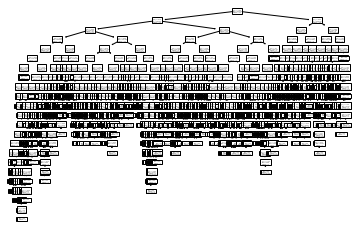

In [64]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [75]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)
r

0.7326422356904776